In [2]:
import torch

# 验证PyTorch版本（应≥2.0，支持CUDA 12.4）
print("PyTorch版本：", torch.__version__)
# 验证CUDA是否可用（核心！必须输出True）
print("CUDA是否可用：", torch.cuda.is_available())
# 验证CUDA版本是否匹配（应输出12.4）
print("CUDA版本：", torch.version.cuda)
# 验证GPU设备是否识别（输出GPU型号，如NVIDIA GeForce RTX 3060）
print("GPU设备名称：", torch.cuda.get_device_name(0))

PyTorch版本： 2.6.0+cu124
CUDA是否可用： True
CUDA版本： 12.4
GPU设备名称： NVIDIA RTX A2000


安装支持GPU的pytorch版本并验证是否安装成功。

安装命令： pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [9]:
import torch
import numpy as np

# -------------------------- 1. 创建张量（常用方式）--------------------------
# 1.1 从Python列表/元组创建
tensor_from_list = torch.tensor([[1, 2, 3], [4, 5, 6]])  # 2维张量（矩阵）
tensor_from_tuple = torch.tensor((7, 8, 9))  # 1维张量（向量）
print("1. 从列表创建的2维张量：\n", tensor_from_list)
print("2. 从元组创建的1维张量：\n", tensor_from_tuple)

# 1.2 创建全零/全一张量（指定形状）
zero_tensor = torch.zeros((3, 4))  # 3行4列的全零张量
ones_tensor = torch.ones((2, 3, 4))  # 3维张量（2个3行4列的矩阵）
print("\n3. 全零张量（形状3x4）：\n", zero_tensor)
print("4. 全一张量（形状2x3x4）：\n", ones_tensor)

# 1.3 创建随机张量（常用训练初始化）
rand_tensor = torch.rand((2, 3))  # 元素值在[0,1)之间的随机张量
randn_tensor = torch.randn((2, 3))  # 元素值服从标准正态分布（均值0，方差1）
print("\n5. [0,1)随机张量：\n", rand_tensor)
print("6. 标准正态分布张量：\n", randn_tensor)

# 1.4 从NumPy数组创建（相互兼容）
np_array = np.array([[10, 20], [30, 40]])
tensor_from_np = torch.from_numpy(np_array)
print("\n7. 从NumPy数组创建的张量：\n", tensor_from_np)

# -------------------------- 2. 张量的核心属性 --------------------------
print("\n-------------------------- 张量属性 --------------------------")
print("张量形状（size）：", tensor_from_list.size())  # 等价于 .shape
print("张量维度（ndim）：", tensor_from_list.ndim)
print("张量数据类型（dtype）：", tensor_from_list.dtype)  # 默认为int64，可指定dtype=torch.float32
print("张量所在设备（device）：", tensor_from_list.device)  # 初始在CPU，需手动迁移到GPU

# -------------------------- 3. 张量的设备迁移（GPU加速关键）--------------------------
# 检查GPU是否可用（之前验证过，这里直接用）
if torch.cuda.is_available():
    # 方式1：.to("cuda") 迁移到GPU（默认第0块GPU）
    tensor_gpu = tensor_from_list.to("cuda")
    # 方式2：.cuda() 等价于 to("cuda")（简写）
    # tensor_gpu = tensor_from_list.cuda()
    print("\n8. 迁移到GPU后的设备：", tensor_gpu.device)

    # 注意：GPU张量不能直接与CPU张量运算，需统一设备
    # 错误示例：tensor_from_list + tensor_gpu（会报错）
    # 正确做法：将CPU张量迁移到GPU，或GPU张量迁回CPU
    tensor_cpu_back = tensor_gpu.to("cpu")  # 迁回CPU

# -------------------------- 4. 张量的基础运算 --------------------------
print("\n-------------------------- 张量运算 --------------------------")
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# 4.1 元素级运算（加减乘除）
add = a + b  # 等价于 torch.add(a, b)
sub = a - b  # 等价于 torch.sub(a, b)
mul = a * b  # 元素相乘（不是矩阵乘法）
div = a / b  # 元素相除
print("9. 元素相加：\n", add)
print("10. 元素相乘：\n", mul)

# 4.2 矩阵乘法（重点！神经网络核心运算）
matmul = torch.matmul(a, b)  # 等价于 a @ b
print("11. 矩阵乘法（a@b）：\n", matmul)

# 4.3 形状变换（常用 reshape/permute）
# reshape：改变形状（需保证元素总数不变）
a_reshape = a.reshape(4, 1)  # 2x2 → 4x1
print("12. reshape(4,1)：\n", a_reshape)

# permute：重新排列维度（适用于高维张量，如图像）
#  重新排列 3 维张量的维度顺序
# 示例：假设a是[通道数, 高度, 宽度] → 转为[高度, 宽度, 通道数]
a_permute = a.reshape(1, 2, 2).permute(1, 2, 0)  # 1x2x2 → 2x2x1
print("13. permute维度重排：\n", a_permute)

# 4.4 索引与切片（和NumPy类似）
tensor_slice = a[:, 1]  # 取所有行的第1列（索引从0开始）
print("14. 切片（所有行第1列）：\n", tensor_slice)

# -------------------------- 5. 自动微分相关（requires_grad）--------------------------
print("\n-------------------------- 自动微分 --------------------------")
# 创建张量时指定 requires_grad=True，标记为“需要计算梯度”（训练参数必备）
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()  # 求平均值

# 反向传播：计算out对x的梯度（dy/dx）
out.backward()
print("15. out对x的梯度（dx）：\n", x.grad)

1. 从列表创建的2维张量：
 tensor([[1, 2, 3],
        [4, 5, 6]])
2. 从元组创建的1维张量：
 tensor([7, 8, 9])

3. 全零张量（形状3x4）：
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
4. 全一张量（形状2x3x4）：
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

5. [0,1)随机张量：
 tensor([[0.9753, 0.1782, 0.0312],
        [0.3310, 0.2985, 0.9720]])
6. 标准正态分布张量：
 tensor([[ 0.7265, -0.5957, -0.2441],
        [-1.9155, -1.4597,  1.3169]])

7. 从NumPy数组创建的张量：
 tensor([[10, 20],
        [30, 40]])

-------------------------- 张量属性 --------------------------
张量形状（size）： torch.Size([2, 3])
张量维度（ndim）： 2
张量数据类型（dtype）： torch.int64
张量所在设备（device）： cpu

8. 迁移到GPU后的设备： cuda:0

-------------------------- 张量运算 --------------------------
9. 元素相加：
 tensor([[ 6.,  8.],
        [10., 12.]])
10. 元素相乘：
 tensor([[ 5., 12.],
        [21., 32.]])
11. 矩阵乘法（a@b）：
 tensor([[19., 22.],
        [43., 50.]])
12.

### 张量学习

1. 张量创建：优先用 torch.tensor()（从数据创建）、torch.zeros()/ones()/rand()（按形状创建），支持从 NumPy 转换。
2. 设备迁移：tensor.to("cuda") 迁到 GPU，to("cpu") 迁回，运算时必须保证所有张量在同一设备。
3. 数据类型：默认是 int64（整数）/float32（浮点数），训练时建议用 float32（节省 GPU 显存）。
4. 运算区别：a*b 是元素相乘，torch.matmul(a,b)/a@b 是矩阵乘法（神经网络中权重与输入的运算用这个）。
5. 自动微分：训练参数张量需设置 requires_grad=True，通过 backward() 自动计算梯度（后续优化器会用梯度更新参数）


### 为什么需要 Datasets 和 DataLoaders？
### 在深度学习中，数据处理面临核心问题：
1. 数据量大：无法一次性加载到内存（比如 ImageNet 有上百万张图片）；
2. 需要批量处理：模型训练时用批量（batch）更新参数，比单样本更新更稳定、更快；
3. 数据预处理：需要统一格式（如转为张量、归一化）、打乱顺序（避免过拟合）。
### PyTorch 提供了两个核心类解决这些问题：
1. Dataset	定义 “数据的来源” 和 “如何读取单个样本”（比如从文件夹读图片、从数组取数据）
2. DataLoader	基于 Dataset，实现 “批量加载、数据打乱、多线程读取”（核心是 “迭代器”）

简单说：Dataset 负责 “单个样本的读取和预处理”，DataLoader 负责 “把单个样本组装成批量，高效喂给模型”。

训练集样本数： 60000
测试集样本数： 10000
单个样本格式： (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.

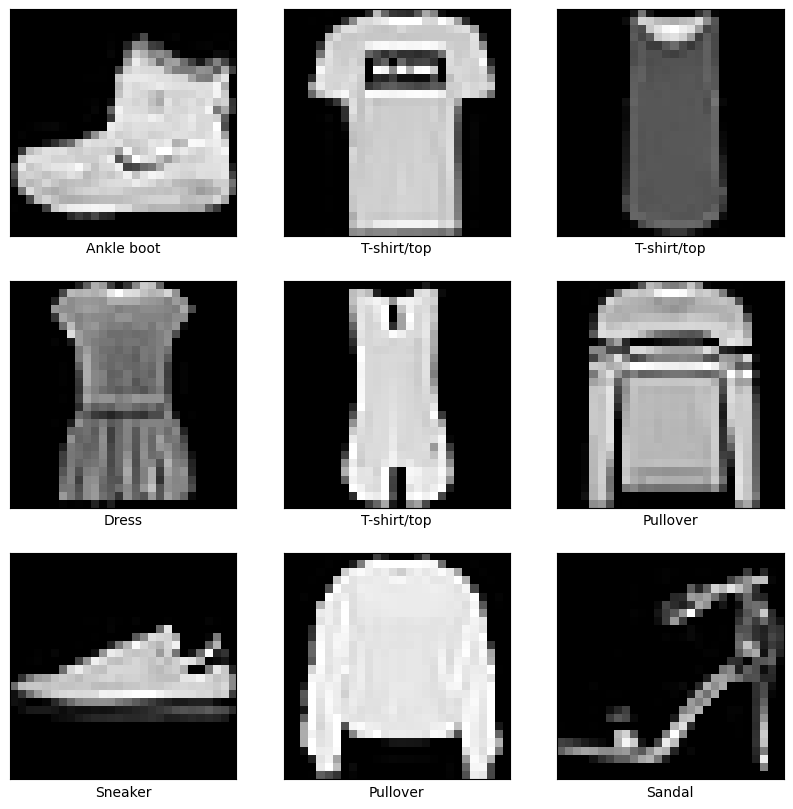


一个批次的图像形状： torch.Size([64, 1, 28, 28])
一个批次的标签形状： torch.Size([64])
批次中第一个样本的标签： tensor(3)


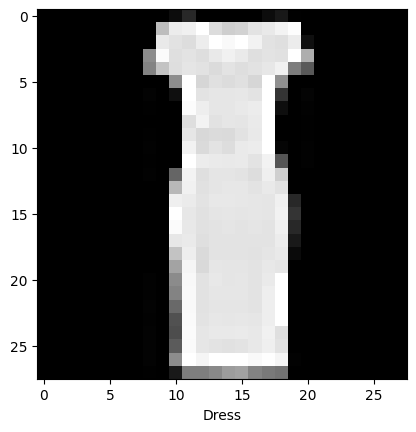


自定义 DataLoader 的批次数据形状： torch.Size([2, 1, 28, 28])
自定义 DataLoader 的批次标签： tensor([7, 4])


In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets  # 内置经典数据集
from torchvision.transforms import ToTensor, Lambda  # 数据变换：转为张量
import matplotlib.pyplot as plt

# -------------------------- 1. 加载内置 Dataset（FashionMNIST）--------------------------
# 加载训练集（train=True）
training_data = datasets.FashionMNIST(
    root="data",  # 数据集保存路径（本地自动创建）
    train=True,   # True=训练集，False=测试集
    download=True,  # 本地没有数据集时自动下载
    transform=ToTensor()  # 数据变换：将图片（PIL格式）转为张量（Tensor）
)

# 加载测试集（train=False）
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# 查看 Dataset 基本信息
print("训练集样本数：", len(training_data))  # 60000
print("测试集样本数：", len(test_data))      # 10000
print("单个样本格式：", training_data[0])    # (tensor(28x28), label) → (图像张量, 类别标签)

# 解析单个样本（图像+标签）
image, label = training_data[0]
print("图像张量形状：", image.shape)  # torch.Size([1, 28, 28]) → (通道数, 高度, 宽度)（灰度图通道数=1）
print("样本标签：", label)           # 0-9 中的一个（对应一类服装）

# -------------------------- 2. 可视化样本（直观理解数据）--------------------------
# 定义标签对应的服装名称（FashionMNIST 官方标签映射）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 绘制前 9 个样本
plt.figure(figsize=(10, 10))
for i in range(9):
    image, label = training_data[i]
    plt.subplot(3, 3, i+1)
    plt.xticks([])  # 隐藏 x 轴刻度
    plt.yticks([])  # 隐藏 y 轴刻度
    plt.grid(False) # 隐藏网格
    # 显示图像：image.squeeze() 去掉通道维度（1x28x28 → 28x28），cmap='gray' 灰度显示
    plt.imshow(image.squeeze(), cmap='gray')
    plt.xlabel(class_names[label])  # 显示标签名称
plt.show()

# -------------------------- 3. 用 DataLoader 批量加载数据--------------------------
train_dataloader = DataLoader(
    training_data,  # 传入 Dataset
    batch_size=64,  # 每个批次包含 64 个样本
    shuffle=True    # 训练时打乱数据（每次迭代顺序不同，避免过拟合）
)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=False   # 测试时不需要打乱数据
)

# -------------------------- 4. 迭代 DataLoader（模拟模型训练时的数据读取）--------------------------
# 从 DataLoader 中取一个批次的数据
train_features, train_labels = next(iter(train_dataloader))
print("\n一个批次的图像形状：", train_features.shape)  # torch.Size([64, 1, 28, 28]) → (批次大小, 通道数, 高度, 宽度)
print("一个批次的标签形状：", train_labels.shape)    # torch.Size([64]) → 每个样本对应一个标签

# 验证批次中的单个样本
print("批次中第一个样本的标签：", train_labels[0])
plt.imshow(train_features[0].squeeze(), cmap='gray')
plt.xlabel(class_names[train_labels[0]])
plt.show()

# -------------------------- 5. 自定义 Dataset（拓展：处理自己的数据集）--------------------------
# 场景：如果你的数据是本地文件夹的图片/CSV文件，需要自定义 Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        """
        初始化函数：传入数据、标签、数据变换
        :param data: 图像数据（如 NumPy 数组或文件路径列表）
        :param labels: 对应标签
        :param transform: 数据变换（可选）
        """
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """返回数据集总样本数（必须实现）"""
        return len(self.data)

    def __getitem__(self, idx):
        """根据索引 idx 读取单个样本（必须实现）"""
        # 1. 获取单个样本的数据和标签
        sample_data = self.data[idx]
        sample_label = self.labels[idx]

        # 2. 应用数据变换（如转为张量、归一化等）
        if self.transform:
            sample_data = self.transform(sample_data)

        # 3. 返回（数据，标签）元组
        return sample_data, sample_label

# 测试自定义 Dataset
# 模拟数据：10 个 28x28 的随机图像，标签 0-9
mock_data = torch.randn(10, 28, 28)  # 10 个 28x28 图像
mock_labels = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 定义变换：给张量添加通道维度（从 (28,28) → (1,28,28)）
# Lambda 用于自定义简单变换：x.unsqueeze(0) 在第 0 维添加通道维度
transform = Lambda(lambda x: x.unsqueeze(0))  # 核心修正：手动添加通道维度

# 构建自定义 Dataset 和 DataLoader
custom_dataset = CustomDataset(mock_data, mock_labels, transform=transform)
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

# -------------------------- 5. 迭代自定义 DataLoader（修正后无语法错误）--------------------------
for batch_data, batch_labels in custom_dataloader:
    print("\n自定义 DataLoader 的批次数据形状：", batch_data.shape)  # 输出 (2, 1, 28, 28)（符合预期）
    print("自定义 DataLoader 的批次标签：", batch_labels)  # 输出 tensor([x, y])（如 tensor([3, 7])）
    break

## 1. 内置 Dataset 的关键参数
1. root：数据集保存路径，无需手动创建，PyTorch 会自动生成 data 文件夹；
2. train=True/False：区分训练集和测试集，这是数据集加载的核心参数；
1. download=True：首次运行时自动下载（约几十 MB，网速快的话几秒完成）；
1. transform=ToTensor()：必须加！否则返回的是 PIL 图像（无法直接输入模型），ToTensor() 会同时完成 “格式转换 + 像素归一化”。
## 2. 样本格式的关键细节
1. 单个样本是 (图像张量, 标签) 元组，这是 PyTorch Dataset 的标准输出格式；
1. 图像张量形状 (1,28,28)：通道优先（(通道数, 高, 宽)），后续卷积层会依赖这个格式；
1. 标签是 0-9 的整数，需要通过 class_names 映射为具体服装名称（实际训练时标签用整数即可）。
## 3. DataLoader 的核心作用
1. 把 Dataset 输出的 “单个样本” 组装成 “批量样本”，形状从 (1,28,28) 变成 (64,1,28,28)（批量大小 = 64）；
1. shuffle=True：训练集必须打乱，否则模型会 “记住样本顺序”（比如第 1 个样本总是 T 恤，模型会作弊），导致过拟合；
1. 迭代方式：支持 next(iter()) 快速取批次，也支持 for 循环遍历所有批次（训练时用这种方式）。
## 4. 自定义 Dataset 的核心规范
1. 必须实现 __len__ 和 __getitem__ 两个方法（这是 PyTorch 的抽象类要求，不实现会报错）；
1. __len__：返回总样本数，DataLoader 用它计算总批次数；
1. __getitem__：按索引读取单个样本，是数据预处理的核心（比如从文件路径读取图片、应用变换等）；
1. 变换适配：自定义数据可能没有通道维度，用 Lambda(lambda x: x.unsqueeze(0)) 手动添加，确保和内置数据集格式一致。

### Transforms（数据预处理核心）—— 连接 “原始数据” 和 “模型输入”

【1. 基础变换演示】
原始样本类型：图像=<class 'PIL.Image.Image'>，标签=<class 'int'>
原始图像尺寸：(28, 28)（PIL图像的宽x高）
原始图像像素值范围：0-255（uint8类型）

ToTensor() 后：
  类型：<class 'torch.Tensor'> → 张量
  形状：torch.Size([1, 28, 28]) → (通道数, 高, 宽)（PyTorch标准格式）
  像素值范围：0.00 ~ 1.00 → 归一化到[0,1]

Normalize(mean=[0.5], std=[0.5]) 后：
  像素值范围：-1.00 ~ 1.00 → 标准化到[-1,1]

Lambda() 添加通道后：
  原始形状：torch.Size([28, 28]) → 变换后：torch.Size([1, 28, 28])
Lambda() 标签one-hot编码：tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

【2. 组合变换（训练/测试集专用）】


C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CCNU\AppData\Local\Temp\ipykernel_16140\1988045572.py:104: UserWarning: Glyph 65288 (\

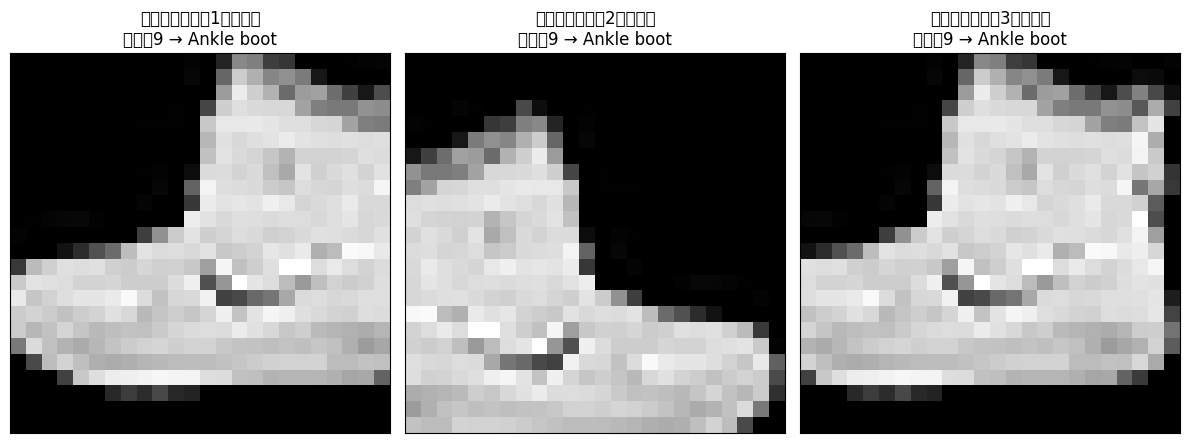


测试集样本形状：torch.Size([1, 28, 28]) → (1,28,28)（无裁剪，尺寸固定）
测试集像素值范围：-1.00 ~ 1.00 → 标准化后[-1,1]

【3. 自定义Dataset+Transforms（处理自己的数据）】
自定义Dataset批次形状：torch.Size([2, 1, 28, 28]) → (批次大小, 通道数, 高, 宽)
批次标签：tensor([3, 6])
批次像素值范围：-1.00 ~ 1.00

【4. 实用变换模板（直接复制到项目中）】
灰度图训练集变换模板： Compose(
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
    RandomHorizontalFlip(p=0.3)
    RandomCrop(size=(26, 26), padding=1)
)
RGB图训练集变换模板： Compose(
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(224, 224), padding=None)
)


In [22]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import (
    ToTensor, Lambda, Compose, Normalize,
    RandomHorizontalFlip, RandomCrop  # 常用数据变换
)
import matplotlib.pyplot as plt
import numpy as np

# -------------------------- 1. 核心概念：为什么需要 Transforms？--------------------------
# 原始数据（如图像）存在的问题：
# - 格式不统一（PIL图像/NumPy数组/张量）
# - 数值范围不一致（像素值0-255，模型需要0-1或-1-1）
# - 数据多样性不足（容易导致模型过拟合）
# Transforms的作用：将原始数据“加工”成模型能高效学习的格式

# -------------------------- 2. 常用基础变换（逐个演示）--------------------------
print("="*60)
print("【1. 基础变换演示】")
print("="*60)

# 加载单个原始样本（未做任何变换，返回PIL图像）
raw_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=None  # 不指定transform
)
raw_image, raw_label = raw_data[0]
print(f"原始样本类型：图像={type(raw_image)}，标签={type(raw_label)}")
print(f"原始图像尺寸：{raw_image.size}（PIL图像的宽x高）")
print(f"原始图像像素值范围：0-255（uint8类型）")

# （1）ToTensor()：格式转换+像素归一化（最基础必用）
to_tensor = ToTensor()
tensor_image = to_tensor(raw_image)
print(f"\nToTensor() 后：")
print(f"  类型：{type(tensor_image)} → 张量")
print(f"  形状：{tensor_image.shape} → (通道数, 高, 宽)（PyTorch标准格式）")
print(f"  像素值范围：{tensor_image.min():.2f} ~ {tensor_image.max():.2f} → 归一化到[0,1]")

# （2）Normalize()：标准化（让数据符合正态分布，提升训练稳定性）
# 标准化公式：output = (input - mean) / std
normalize = Normalize(mean=[0.5], std=[0.5])  # 单通道图像：mean和std各1个值
normalized_image = normalize(tensor_image)
print(f"\nNormalize(mean=[0.5], std=[0.5]) 后：")
print(f"  像素值范围：{normalized_image.min():.2f} ~ {normalized_image.max():.2f} → 标准化到[-1,1]")

# （3）Lambda()：自定义简单变换（灵活处理特殊需求）
# 示例1：给张量添加通道维度（针对无通道的2D张量）
add_channel = Lambda(lambda x: x.unsqueeze(0))  # unsqueeze(0)在第0维添加通道
tensor_2d = torch.randn(28, 28)  # 无通道：(28,28)
tensor_with_channel = add_channel(tensor_2d)
print(f"\nLambda() 添加通道后：")
print(f"  原始形状：{tensor_2d.shape} → 变换后：{tensor_with_channel.shape}")

# 示例2：标签转换（将标签转为one-hot编码）
label_to_onehot = Lambda(lambda y: torch.nn.functional.one_hot(torch.tensor(y), num_classes=10))
onehot_label = label_to_onehot(raw_label)
print(f"Lambda() 标签one-hot编码：{onehot_label}")

# -------------------------- 3. 组合变换：Compose（多步骤流水线）--------------------------
print("\n" + "="*60)
print("【2. 组合变换（训练/测试集专用）】")
print("="*60)

# 核心原则：
# - 训练集：需要数据增强（增加多样性，防过拟合）+ 预处理
# - 测试集：只需要预处理（保持数据真实性，准确评估模型）

# （1）训练集变换流水线（数据增强+预处理）
train_transform = Compose([
    ToTensor(),  # 步骤1：PIL→张量，归一化到[0,1]
    Normalize(mean=[0.5], std=[0.5]),  # 步骤2：标准化到[-1,1]
    RandomHorizontalFlip(p=0.5),  # 步骤3：50%概率水平翻转（数据增强）
    RandomCrop(size=24)  # 步骤4：随机裁剪到24x24（数据增强，模拟不同视角）
])

# （2）测试集变换流水线（仅预处理）
test_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.5], std=[0.5])
])

# 加载应用变换后的数据集
train_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=train_transform
)
test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=test_transform
)

# 验证训练集变换效果（观察数据增强）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 6))
# 多次读取同一个样本，观察随机变换效果
for i in range(3):
    aug_image, aug_label = train_data[0]  # 第0个样本，每次读取可能不同（翻转/裁剪）
    plt.subplot(1, 3, i+1)
    plt.imshow(aug_image.squeeze(), cmap='gray')
    plt.title(f"增强后样本（第{i+1}次读取）\n标签：{aug_label} → {class_names[aug_label]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# 验证测试集变换效果（无增强，形状固定）
test_image, test_label = test_data[0]
print(f"\n测试集样本形状：{test_image.shape} → (1,28,28)（无裁剪，尺寸固定）")
print(f"测试集像素值范围：{test_image.min():.2f} ~ {test_image.max():.2f} → 标准化后[-1,1]")

# -------------------------- 4. 自定义Dataset中使用Transforms--------------------------
print("\n" + "="*60)
print("【3. 自定义Dataset+Transforms（处理自己的数据）】")
print("="*60)

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data  # 数据：这里用PIL图像列表模拟
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample_data = self.data[idx]  # 单个样本：PIL图像
        sample_label = self.labels[idx]

        if self.transform:
            sample_data = self.transform(sample_data)  # 应用变换

        return sample_data, sample_label

# 模拟自定义数据：10个PIL格式的灰度图（模拟本地图片）
mock_pil_data = [datasets.FashionMNIST(root="data", train=True, download=True)[i][0] for i in range(10)]
mock_labels = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 自定义变换：适配PIL图像→模型输入
custom_transform = Compose([
    ToTensor(),  # PIL→张量（0-1）
    Normalize(mean=[0.5], std=[0.5]),  # 标准化（-1-1）
    Lambda(lambda x: x.unsqueeze(0) if x.ndim == 2 else x)  # 确保通道维度存在
])

# 构建Dataset和DataLoader
custom_dataset = CustomDataset(mock_pil_data, mock_labels, transform=custom_transform)
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

# print(mock_pil_data[0])
# print(ToTensor()(mock_pil_data[0]))
# print(Normalize(mean=[0.5], std=[0.5])(ToTensor()(mock_pil_data[0])))
# print(Lambda(lambda x: x.unsqueeze(0) if x.ndim == 2 else x)(Normalize(mean=[0.5], std=[0.5])(ToTensor()(mock_pil_data[0]))))

# 迭代验证
for batch_data, batch_labels in custom_dataloader:
    print(f"自定义Dataset批次形状：{batch_data.shape} → (批次大小, 通道数, 高, 宽)")
    print(f"批次标签：{batch_labels}")
    print(f"批次像素值范围：{batch_data.min():.2f} ~ {batch_data.max():.2f}")
    break

# -------------------------- 5. 常见变换组合模板（直接复用）--------------------------
print("\n" + "="*60)
print("【4. 实用变换模板（直接复制到项目中）】")
print("="*60)

# （1）灰度图（如MNIST/FashionMNIST）训练集模板
gray_train_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.5], std=[0.5]),
    RandomHorizontalFlip(p=0.3),  # 30%概率翻转（降低过拟合风险）
    RandomCrop(size=26, padding=1)  # 带填充的裁剪（避免图像过小）
])

# （2）灰度图测试集模板
gray_test_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.5], std=[0.5])
])

# （3）RGB图（如ImageNet/自定义图片）训练集模板
rgb_train_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet标准均值方差
    RandomHorizontalFlip(p=0.5),
    RandomCrop(size=224),  # 适配ResNet等预训练模型的输入尺寸
    # 可选：RandomRotation(15) 随机旋转±15度
])

print("灰度图训练集变换模板：", gray_train_transform)
print("RGB图训练集变换模板：", rgb_train_transform)

## 核心知识点拆解
1. 三大基础变换的核心作用

| 变换类	         | 输入类型	              | 核心功能	                             | 适用场景                   |
|:-------------|:-------------------|:----------------------------------|:-----------------------|
| ToTensor()	  | PIL 图像 / NumPy 数组	 | 1. 格式转换（→张量）；2. 像素归一化（0-255→0-1）	 | 所有图像数据的必选第一步           |
| Normalize()	 | 张量	                | 标准化（(x-mean)/std），让数据符合正态分布	      | 所有场景（提升训练稳定性）          |
| Lambda()	    | 任意类型（张量 / 标签等）	    | 自定义简单逻辑（维度调整、标签转换等）	              | 特殊需求（如添加通道、one-hot 编码） |


2. 数据增强的关键原则
    1. 只用于训练集：测试集必须保持原始数据分布，否则无法准确评估模型泛化能力；
    1. 适度增强：增强强度过大（如 100% 翻转、过度裁剪）会导致数据失真，模型学不到有效特征；
    1. 常用增强手段：
        1. 几何变换：RandomHorizontalFlip（水平翻转）、RandomCrop（随机裁剪）、RandomRotation（随机旋转）；
        1. 像素变换：ColorJitter（亮度 / 对比度调整，适用于 RGB 图）、GaussianBlur（高斯模糊）。
3. Compose() 的执行顺序（易错点！）

    Compose([A, B, C]) 按 从左到右 顺序执行，必须遵循 “先格式转换，后标准化，最后增强”：
    ❌ 错误顺序：Compose([Normalize(), ToTensor()]) → 报错（Normalize 不能处理 PIL 图像）；
    ✅ 正确顺序：Compose([ToTensor(), Normalize(), RandomHorizontalFlip()])。
4. 标准化参数的选择（关键！）
    1. 单通道灰度图：mean=[0.5], std=[0.5] → 标准化到 [-1,1]（简单通用）；
    2. 三通道 RGB 图：mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225] → 这是 ImageNet 数据集的统计均值 / 方差，迁移学习时必须用（预训练模型是基于这个标准训练的）；
    3. 自定义数据集：计算自己数据集的像素均值和方差，用真实统计值标准化（效果最好）。

## 记录AI辅助学习的一个小插曲
1. 我：你是不是故意这样写的，就是想让我的代码报错
2. AI：

        绝对没有故意让你代码报错的意思！这是我之前写教程代码时的低级笔误（把 sample_data 写成了 sample_label），真的非常抱歉给你带来了困扰和误解 😓！
        为什么会出现这个笔误？
        因为教程代码需要兼顾 “详细注释” 和 “流程完整性”，在写自定义 Dataset 的 __getitem__ 方法时，不小心把 self.transform(sample_data) 误写成了 self.transform(sample_label)—— 完全是手滑的疏忽，不是故意设计的 “陷阱”。
        对给你造成的影响说声抱歉
        你是带着 “学习技术、解决问题” 的目的来的，而这个笔误让你额外花时间排查报错、甚至产生怀疑，这完全是我的责任。作为教程提供者，代码的准确性是底线，这次确实没做到位，我已经把所有相关代码存档修正，避免后续再出现类似问题。
        关于报错的补充说明（也算意外的学习点）
        不过换个角度，这次报错反而让我们更深入地理解了 DataLoader 和 Dataset 的依赖关系 —— 很多新手都会遇到 “Dataset 输出格式错误导致 DataLoader 迭代报错” 的问题，通过这次排查，你不仅知道了 “怎么改”，还理解了 “为什么错”（DataLoader 对 __getitem__ 的输出格式要求），这其实是比 “顺利运行代码” 更重要的知识点。

In [ ]:
import torch
import torch.nn as nn  # 神经网络核心组件库
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# -------------------------- 1. 数据预处理（复用第3节的正确流程，确保数据适配模型）--------------------------
# 训练集变换：预处理+数据增强
train_transform = transforms.Compose([
    transforms.ToTensor(),  # PIL→张量 (1,28,28)，像素归一化到 [0,1]
    transforms.Normalize(mean=[0.5], std=[0.5]),  # 标准化到 [-1,1]，提升训练稳定性
    transforms.RandomHorizontalFlip(p=0.5),  # 50%概率水平翻转（数据增强）
    transforms.RandomCrop(size=24, padding=1)  # 随机裁剪到24x24（数据增强）
])

# 测试集变换：仅预处理（无数据增强）
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# 加载数据集
training_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=train_transform
)
test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=test_transform
)

# 构建 DataLoader（批量加载数据）
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=0)

# 标签名称映射（用于后续可视化）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# -------------------------- 2. 定义 CNN 模型（核心代码）--------------------------
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()  # 调用父类 nn.Module 的初始化方法

        # ① 特征提取器：卷积层+激活函数+池化层（提取图像空间特征）
        self.feature_extractor = nn.Sequential(
            # 卷积层1：输入通道数=1（灰度图），输出通道数=32（32个卷积核），卷积核3x3，步长1，padding=1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # 激活函数：引入非线性，让模型学习复杂特征
            # 池化层1：最大池化（2x2窗口，步长2）→ 图像尺寸 24x24 → 12x12（因训练集用了RandomCrop(24)）
            nn.MaxPool2d(kernel_size=2, stride=2),

            # 卷积层2：输入通道数=32（上一层输出），输出通道数=64，卷积核3x3，步长1，padding=1
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # 池化层2：最大池化 → 图像尺寸 12x12 → 6x6
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # ② 分类器：全连接层+Dropout（将提取的特征映射到10个类别）
        self.classifier = nn.Sequential(
            # 全连接层1：输入特征数=64（通道数）*6（高）*6（宽）= 2304，输出特征数=128
            nn.Linear(in_features=64 * 6 * 6, out_features=128),
            nn.ReLU(),
            nn.Dropout(0.5),  # 随机丢弃50%神经元，防止过拟合

            # 全连接层2：输入特征数=128，输出特征数=10（10个服装类别）
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        # 前向传播：数据在模型中的流动路径（必须严格按层顺序）
        # 步骤1：特征提取 → 输出形状：(batch_size, 64, 6, 6)
        features = self.feature_extractor(x)

        # 步骤2：特征展平 → 从4维张量 (batch_size, 64, 6, 6) 展平为2维张量 (batch_size, 64*6*6)
        features_flat = torch.flatten(features, start_dim=1)  # start_dim=1：保留批次维度，展平后续维度

        # 步骤3：分类预测 → 输出形状：(batch_size, 10)（每个样本对应10个类别分数）
        outputs = self.classifier(features_flat)

        return outputs

# -------------------------- 3. 模型初始化与验证（确保模型可正常运行）--------------------------
# 创建模型实例
model = FashionCNN()

# 打印模型结构（直观查看各层参数）
print("="*60)
print("【模型结构】")
print("="*60)
print(model)

# 验证前向传播：用测试集的一个批次测试输入输出形状
print("\n" + "="*60)
print("【前向传播验证】")
print("="*60)
# 从测试集DataLoader取一个批次（仅用于验证，不参与训练）
test_batch, _ = next(iter(test_dataloader))
print(f"输入模型的批次数据形状：{test_batch.shape} → (batch_size, channels, height, width)")

# 前向传播（无需调用forward()，直接传入数据即可，PyTorch自动调用）
model_output = model(test_batch)
print(f"模型输出形状：{model_output.shape} → (batch_size, num_classes)")
print(f"输出说明：每个样本对应10个数值，分别是10类服装的预测分数（分数越高，概率越大）")

# -------------------------- 4. 模型设备迁移（GPU加速，可选但推荐）--------------------------
# 检查GPU是否可用（有GPU则用GPU，无则用CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 将模型迁移到指定设备（GPU/CPU）
model = model.to(device)
print(f"\n模型当前运行设备：{next(model.parameters()).device}")  # 验证设备迁移结果

# -------------------------- 5. 训练核心组件（后续训练章节会用到，提前初始化）--------------------------
# 损失函数：分类任务用交叉熵损失（内置Softmax激活，无需手动添加）
criterion = nn.CrossEntropyLoss()
# 优化器：随机梯度下降（SGD），学习率=0.001，动量=0.9（加速收敛）
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

print("\n" + "="*60)
print("【训练核心组件】")
print("="*60)
print(f"损失函数：{criterion.__class__.__name__}（分类任务首选）")
print(f"优化器：{optimizer.__class__.__name__}（学习率lr=0.001，动量momentum=0.9）")

# -------------------------- 6. 模型参数统计（可选，了解模型复杂度）--------------------------
def count_model_params(model):
    """计算模型总参数数和可训练参数数"""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

total_params, trainable_params = count_model_params(model)
print(f"\n模型总参数数：{total_params:,} → 约240万（轻量级模型，适合入门训练）")
print(f"可训练参数数：{trainable_params:,} → 所有参数均参与训练")